[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/fonnesbeck/Bios8366/blob/master/notebooks/Section0_2-Plotting-and-Visualization.ipynb)

# Plotting and Visualization in Python

In 2016, there are more options for generating plots in Python than ever before:

- matplotlib
- Pandas
- Seaborn
- ggplot
- Bokeh
- Altair
- Plotly

Эти пакеты различаются по своим API, форматам вывода и сложности. Такой пакет, как matplotlib, хотя и является мощным, является относительно низкоуровневым пакетом для построения графиков, который делает очень мало предположений о том, что представляет собой хороший макет (по дизайну), но обладает большой гибкостью, позволяющей пользователю полностью настроить внешний вид вывода. .

С другой стороны, Seaborn и Pandas включают методы для объектов DataFrame и Series, которые являются относительно высокоуровневыми и делают разумные предположения о том, как должен выглядеть график. Это позволяет пользователям создавать визуализации публикационного качества относительно автоматизированным способом.

# Matplotlib

Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures in Python. Some of the many advantages of this library includes:

* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Great control of every element in a figure, including figure size and DPI. 
* High-quality output in many formats, including PNG, PDF, SVG, EPS.
* GUI for interactively exploring figures *and* support for headless generation of figure files (useful for batch jobs).

Одной из ключевых особенностей matplotlib, которую я хотел бы подчеркнуть и которая, я думаю, делает matplotlib очень подходящим для создания рисунков для научных публикаций, является то, что всеми аспектами рисунка можно управлять программно. Это важно для воспроизводимости, удобно, когда нужно регенерировать фигуру с обновленными данными или изменить ее внешний вид.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## MATLAB-like API

Как следует из названия, matplotlib разработан для совместимости с функциями построения графиков MATLAB, поэтому с ним легко начать работу, если вы знакомы с MATLAB.

### Example

Let's import some data and plot a simple figure with the MATLAB-like plotting API.

In [2]:
rain = pd.read_table('../data/nashville_precip.txt', delimiter='\s+', na_values='NA', index_col=0)
rain.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1871,2.76,4.58,5.01,4.13,3.30,2.98,1.58,2.36,0.95,1.31,2.13,1.65
1872,2.32,2.11,3.14,5.91,3.09,5.17,6.10,1.65,4.50,1.58,2.25,2.38
1873,2.96,7.14,4.11,3.59,6.31,4.20,4.63,2.36,1.81,4.28,4.36,5.94
1874,5.22,9.23,5.36,11.84,1.49,2.87,2.65,3.52,3.12,2.63,6.12,4.19
1875,6.15,3.06,8.14,4.22,1.73,5.63,8.12,1.60,3.79,1.25,5.46,4.30


In [3]:
x = rain.index.values
y = rain['Jan'].values

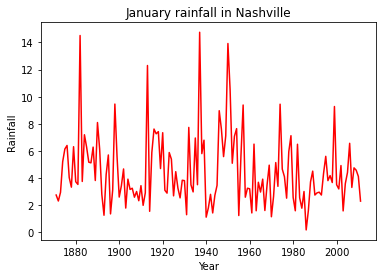

In [4]:
plt.figure()
plt.plot(x, y, 'r')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.title('January rainfall in Nashville');

It is straightforward to customize plotting symbols and create subplots.

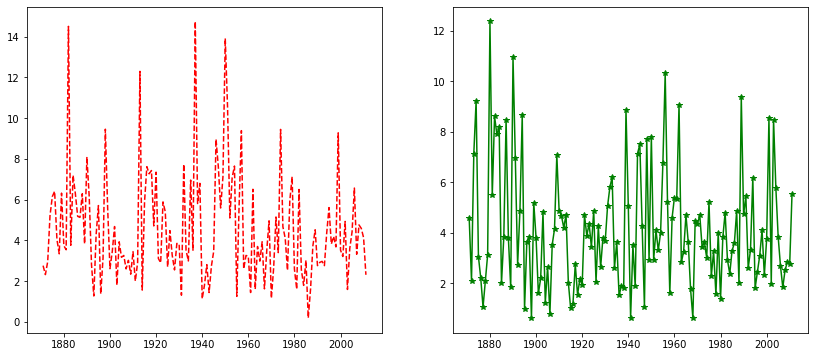

In [5]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(x, y, 'r--')
plt.subplot(1,2,2)
plt.plot(x, rain['Feb'], 'g*-');

Хотя MATLAB-подобный API прост и удобен, стоит изучить объектно-ориентированный API построения графиков matplotlib. Он удивительно мощный и для продвинутых фигур, с второстепенными сюжетами, вставками и другими компонентами, с которыми очень приятно работать.

## Object-oriented API

Основная идея объектно-ориентированного программирования состоит в том, чтобы иметь объекты со связанными с ними методами и функциями, которые работают с ними, и никакие состояния объекта или программы не должны быть глобальными.

Чтобы использовать объектно-ориентированный API, мы начинаем так же, как и в предыдущем примере, но вместо создания нового глобального экземпляра фигуры мы сохраняем ссылку на вновь созданный экземпляр фигуры в переменной `fig`, и из нее мы создаем новый экземпляр оси `axes` с использованием метода `add_axes` в экземпляре класса `fig` `fig`.

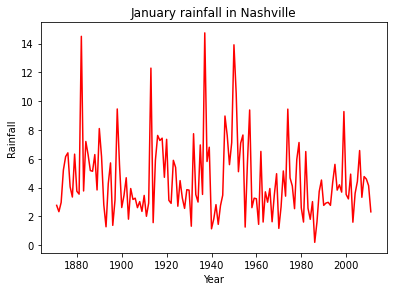

In [6]:
fig = plt.figure()

# left, bottom, width, height (range 0 to 1)
# as fractions of figure size
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 

axes.plot(x, y, 'r')

axes.set_xlabel('Year')
axes.set_ylabel('Rainfall')
axes.set_title('January rainfall in Nashville');

Хотя требуется немного больше кода, преимущество состоит в том, что теперь у нас есть полный контроль над расположением осей графика, и мы можем легко добавить к фигуре более одной оси.

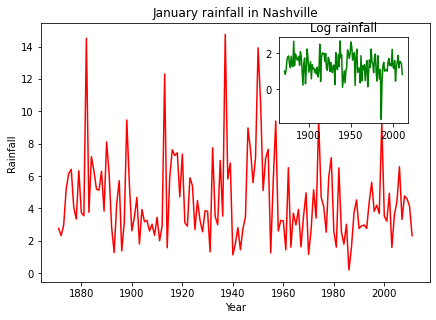

In [7]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.9, 0.9]) # main axes
axes2 = fig.add_axes([0.65, 0.65, 0.3, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('Year')
axes1.set_ylabel('Rainfall')
axes1.set_title('January rainfall in Nashville');

# insert
axes2.plot(x, np.log(y), 'g')
axes2.set_title('Log rainfall');

Если нам не нужно явно указывать, где наши оси графика размещены на холсте рисунка, то мы можем использовать один из многих менеджеров компоновки осей в matplotlib, таких как подграфики.

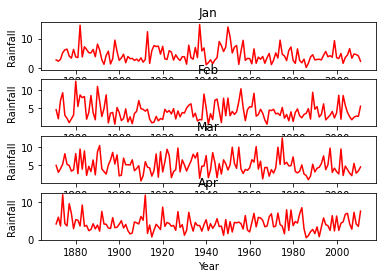

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=1)

months = rain.columns

for i,ax in enumerate(axes):
    ax.plot(x, rain[months[i]], 'r')
    ax.set_xlabel('Year')
    ax.set_ylabel('Rainfall')
    ax.set_title(months[i])


Это было легко, но не так красиво с перекрывающимися осями фигур и метками, верно?

Мы можем справиться с этим, добавив аргумент constrained_layput=True к вызову подграфиков, который автоматически регулирует положение осей на холсте фигуры, чтобы не было перекрывающегося содержимого:

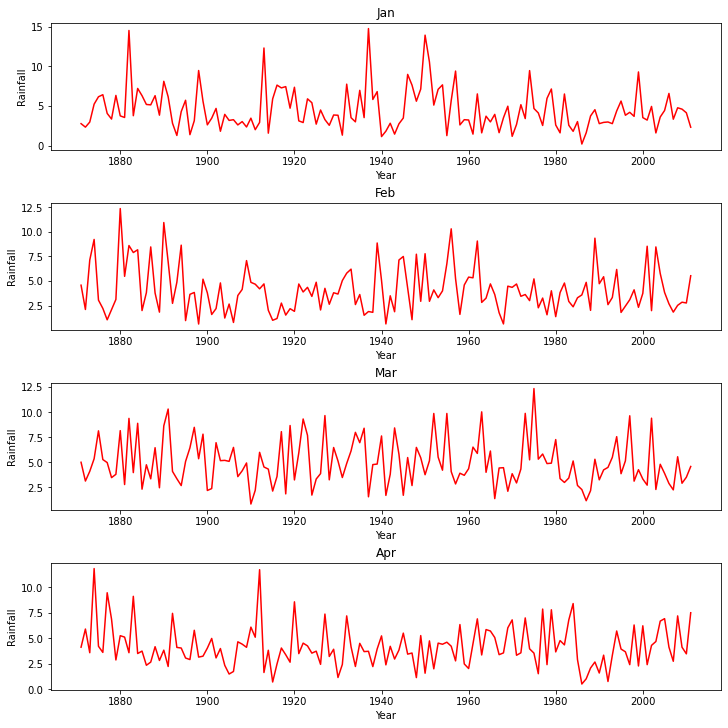

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,10), constrained_layout=True)

for i,ax in enumerate(axes):
    ax.plot(x, rain[months[i]], 'r')
    ax.set_xlabel('Year')
    ax.set_ylabel('Rainfall')
    ax.set_title(months[i])
    
# This also works!
# fig.tight_layout()

## Manipulating figure attributes

Matplotlib позволяет указывать соотношение сторон, DPI и размер фигуры при создании объекта Figure с использованием аргументов ключевых слов figsize и dpi. figsize — это кортеж с шириной и высотой фигуры в дюймах, а dpi — количество точек на дюйм (пиксель на дюйм). Чтобы создать фигуру размером 800 на 400 пикселей, мы можем сделать:

In [10]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

The same arguments can also be passed to layout managers, such as the `subplots` function.

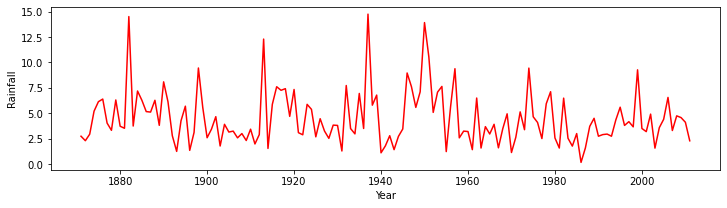

In [11]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('Year')
axes.set_ylabel('Rainfall');

Legends can also be added to identify labelled data.

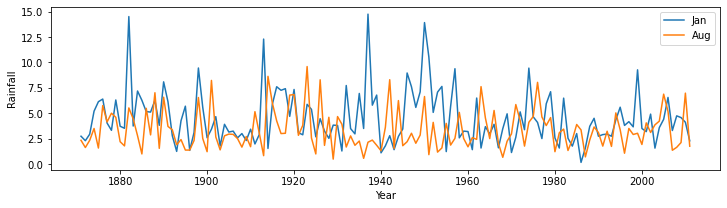

In [12]:
fig, ax = plt.subplots(figsize=(12,3))

ax.plot(x, rain['Jan'], label="Jan")
ax.plot(x, rain['Aug'], label="Aug")
ax.set_xlabel('Year')
ax.set_ylabel('Rainfall')
ax.legend(loc=1); # upper left corner

Visualizations can be fine tuned in maplotlib, using the attibutes of the figure and axes.

C:\Users\MARGAR~1\AppData\Local\Temp/ipykernel_3368/1924540850.py:9: RuntimeWarning: divide by zero encountered in log
  mon = [0.2386*np.log(i)-0.3751 for i in gensub]


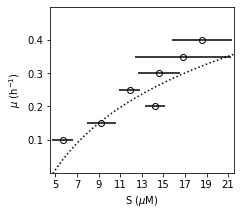

In [13]:
fig = plt.figure(figsize=(3.54, 3.2))
ax = fig.add_subplot(111)

muy = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.52,0.54]
sx = [5.668743677,9.254533132,14.23590137,11.87910853,14.6118157,16.8120231,18.58892361,100.1652558,443.4712272]
er = [0.986042277,1.328704279,0.913025089,0.997960015,1.921483929,4.435,2.817,0,0]

gensub = np.arange(0, 25, 0.1)
mon = [0.2386*np.log(i)-0.3751 for i in gensub]

fig.subplots_adjust(left=0.19, bottom=0.16, right=0.91)

ax.set_ylabel("$\mu$ (h$^{-1}$)")
ax.set_xlabel("S ($\mu$M)")

ax.set_xticks(np.arange(5, 23, 2))
ax.set_xlim(4.5, 21.5)

ax.set_yticks(np.arange(0.1, 0.5, 0.1))
ax.set_ylim(0, 0.5)

ax.errorbar(sx, muy, xerr=er, barsabove=True, ls="none", marker="o", mfc="w", color="k")
ax.plot(gensub, mon, ls="dotted", marker="None", mfc="k", color="k");

# Plotting with Pandas

matplotlib — относительно низкоуровневый пакет для построения графиков по сравнению с другими. Он делает очень мало предположений о том, что представляет собой хороший макет (по дизайну), но обладает большой гибкостью, позволяющей пользователю полностью настроить внешний вид вывода.

С другой стороны, Pandas включает методы для объектов DataFrame и Series, которые являются относительно высокоуровневыми и делают разумные предположения о том, как должен выглядеть график.

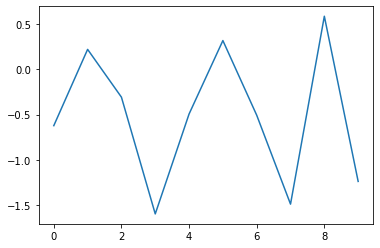

In [14]:
normals = pd.Series(np.random.normal(size=10))
normals.plot();

Обратите внимание, что по умолчанию рисуется линейный график со светлым фоном. Эти решения были приняты пандами от вашего имени.

Однако все это можно изменить:

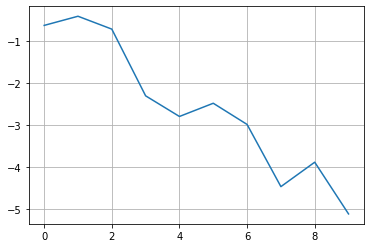

In [15]:
normals.cumsum().plot(grid=True);

Similarly, for a DataFrame:

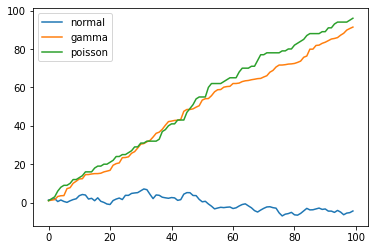

In [16]:
variables = pd.DataFrame({'normal': np.random.normal(size=100), 
                       'gamma': np.random.gamma(1, size=100), 
                       'poisson': np.random.poisson(size=100)})
variables.cumsum(0).plot();

As an illustration of the high-level nature of Pandas plots, we can split multiple series into subplots with a single argument for `plot`:

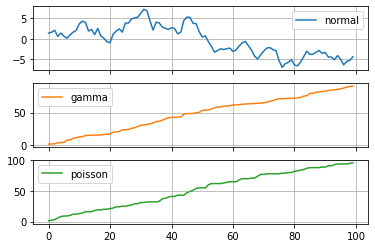

In [17]:
variables.cumsum(0).plot(subplots=True, grid=True);

Или мы можем захотеть, чтобы некоторые серии отображались на вторичной оси Y, что может обеспечить большую детализацию и меньше пустого места:

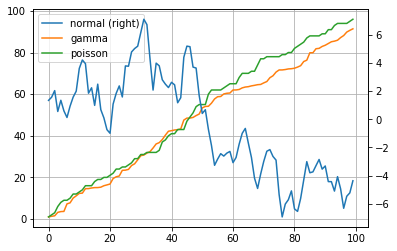

In [18]:
variables.cumsum(0).plot(secondary_y='normal', grid=True);

Если нам нужно немного больше контроля, мы можем напрямую использовать функцию subplots matplotlib и вручную назначать графики ее осям:

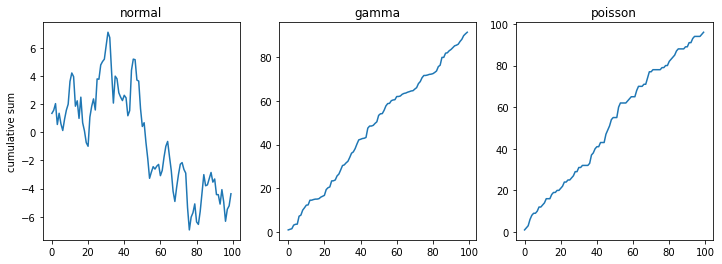

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i,var in enumerate(['normal','gamma','poisson']):
    variables[var].cumsum(0).plot(ax=axes[i], title=var)
axes[0].set_ylabel('cumulative sum');

## Bar plots

Гистограммы полезны для отображения и сравнения измеримых величин, например количества или объема. В Pandas мы просто используем метод plot с аргументом kind='bar'.

Для этой серии примеров давайте загрузим набор данных Titanic:

In [20]:
titanic = pd.read_excel("../data/titanic.xls", "titanic")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


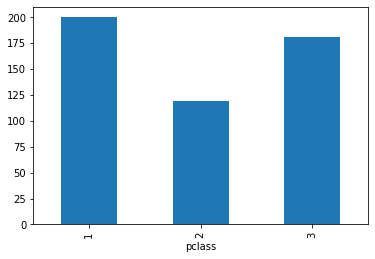

In [21]:
titanic.groupby('pclass').survived.sum().plot.bar();

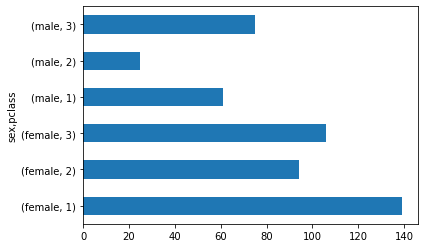

In [22]:
titanic.groupby(['sex','pclass']).survived.sum().plot.barh();

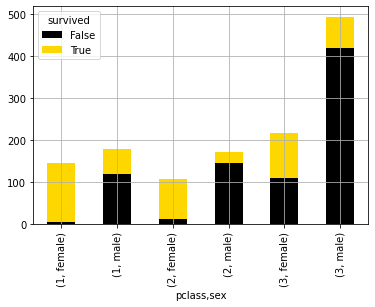

In [23]:
death_counts = pd.crosstab([titanic.pclass, titanic.sex], titanic.survived.astype(bool))
death_counts.plot.bar(stacked=True, color=['black','gold'], grid=True);

Еще один способ сравнения групп — посмотреть на выживаемость, сделав поправку на количество людей в каждой группе.

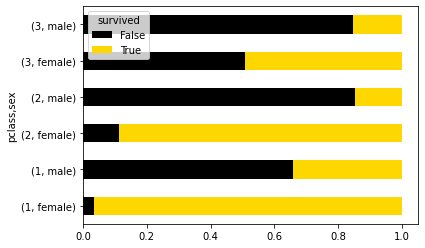

In [24]:
death_counts.div(death_counts.sum(1).astype(float), axis=0).plot.barh(stacked=True, color=['black','gold']);

## Histograms

Часто полезно посмотреть на распределение данных, прежде чем анализировать их. Гистограммы представляют собой гистограммы, отображающие относительную частоту значений данных; следовательно, ось y всегда является некоторой мерой частоты. Это могут быть либо необработанные подсчеты значений, либо масштабированные пропорции.

Например, мы можем захотеть увидеть, как распределялась плата за проезд на борту «Титаника»:

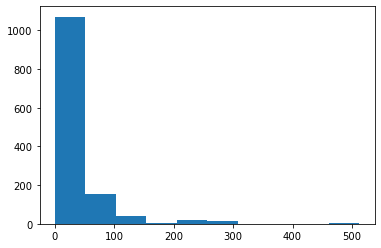

In [25]:
titanic.fare.hist(grid=False);

Метод hist помещает непрерывные значения тарифов в ячейки, пытаясь принять разумное решение о том, сколько ячеек использовать (или, что то же самое, насколько широки ячейки). Мы можем переопределить значение по умолчанию (10):

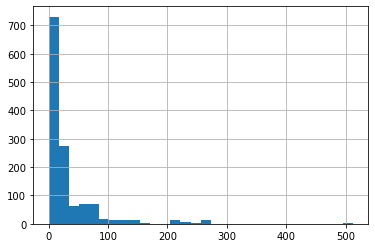

In [26]:
titanic.fare.hist(bins=30);

Существуют алгоритмы определения «оптимального» количества бинов, каждый из которых каким-то образом зависит от количества наблюдений в ряду данных.

In [27]:
from scipy.stats import kurtosis
doanes = lambda data: int(1 + np.log(len(data)) + np.log(1 + kurtosis(data) * (len(data) / 6.) ** 0.5))

n = len(titanic)
doanes(titanic.fare.dropna())

14

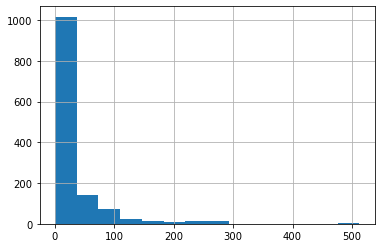

In [28]:
titanic.fare.hist(bins=doanes(titanic.fare.dropna()));

График плотности похож на гистограмму в том, что он описывает распределение базовых данных, но представляет собой не чисто эмпирическое представление, а оценку лежащего в основе «истинного» распределения. В результате он сглажен в непрерывный линейный график. Мы создаем их в Pandas, используя метод plot с kind='kde', где kde означает оценку плотности ядра.

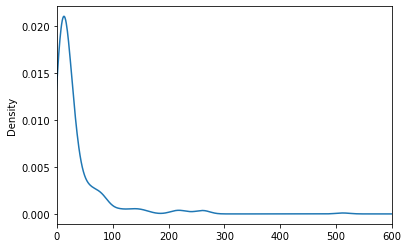

In [29]:
titanic.fare.dropna().plot.kde(xlim=(0,600));

Часто гистограммы и графики плотности отображаются вместе:

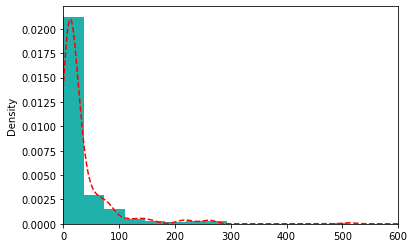

In [30]:
titanic.fare.hist(bins=doanes(titanic.fare.dropna()), density=True, color='lightseagreen')
titanic.fare.dropna().plot.kde(xlim=(0,600), style='r--');

Здесь нам пришлось нормализовать гистограмму (density=True), поскольку плотность ядра нормализована по определению (это распределение вероятностей).

Мы более подробно рассмотрим оценки плотности ядра в следующем разделе.

## Boxplots

Другим способом визуализации распределения данных является блочная диаграмма, которая представляет собой отображение общих квантилей; обычно это квартили, а также нижние и верхние 5-процентные значения.

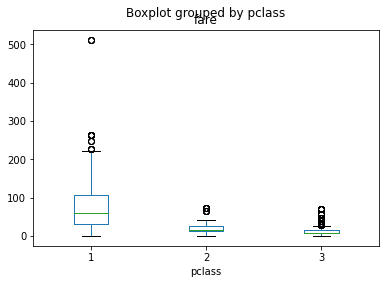

In [31]:
titanic.boxplot(column='fare', by='pclass', grid=False);

Вы можете думать о блочной диаграмме как о просмотре распределения сверху. Синие кресты — это «выбросы» точек, которые находятся за пределами крайних квантилей.

Один из способов добавить дополнительную информацию к ящичковой диаграмме — наложить фактические данные; как правило, это лучше всего подходит для рядов данных небольшого или среднего размера.

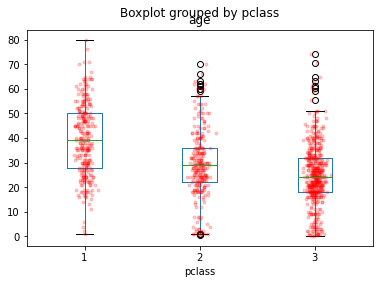

In [32]:
bp = titanic.boxplot(column='age', by='pclass', grid=False)
for i in [1,2,3]:
    y = titanic.age[titanic.pclass==i].dropna()
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y.values, 'r.', alpha=0.2)

Когда данные плотные, пара трюков, использованных выше, помогает визуализировать:

уменьшение альфа-уровня, чтобы сделать точки частично прозрачными
добавление случайного «дрожания» по оси x, чтобы избежать чрезмерного удара

### Exercise

Using the Titanic data, create kernel density estimate plots of the age distributions of survivors and victims.

In [33]:
# Write your answer here

## Scatterplots

To look at how Pandas does scatterplots, let's look at a small dataset in wine chemistry.

In [34]:
wine = pd.read_table("../data/wine.dat", sep='\s+')

attributes = ['Grape',
            'Alcohol',
            'Malic acid',
            'Ash',
            'Alcalinity of ash',
            'Magnesium',
            'Total phenols',
            'Flavanoids',
            'Nonflavanoid phenols',
            'Proanthocyanins',
            'Color intensity',
            'Hue',
            'OD280/OD315 of diluted wines',
            'Proline']

wine.columns = attributes

Диаграммы рассеяния полезны для исследования данных, когда мы пытаемся выявить взаимосвязи между переменными. Для объектов Series или DataFrame нет методов диаграммы рассеяния; вместо этого мы должны использовать функцию разброса matplotlib.

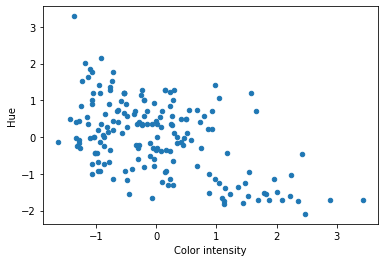

In [35]:
wine.plot.scatter('Color intensity', 'Hue');

Мы можем добавить дополнительную информацию к диаграммам рассеяния, назначив переменные либо размеру символов, либо их цветам.

C:\Users\Margarita\Anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


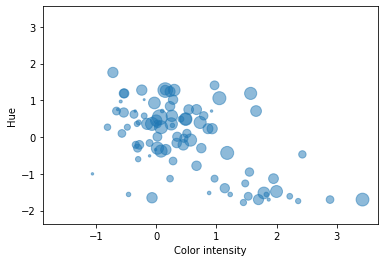

In [36]:
wine.plot.scatter('Color intensity', 'Hue', s=wine.Alcohol*100, alpha=0.5);

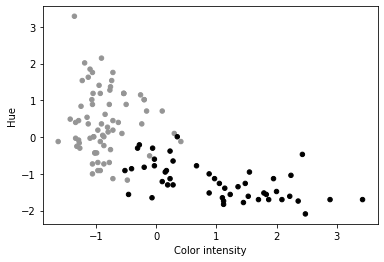

In [37]:
wine.plot.scatter('Color intensity', 'Hue', c=wine.Grape);

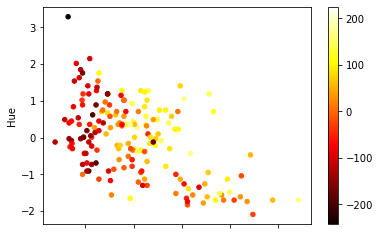

In [38]:
wine.plot.scatter('Color intensity', 'Hue', c=wine.Alcohol*100, cmap='hot');

Чтобы одновременно просматривать диаграммы рассеяния большого количества переменных, мы можем использовать функцию scatter_matrix, недавно добавленную в Pandas. Он генерирует матрицу парных диаграмм рассеяния, опционально с гистограммами или оценками плотности ядра по диагонали.

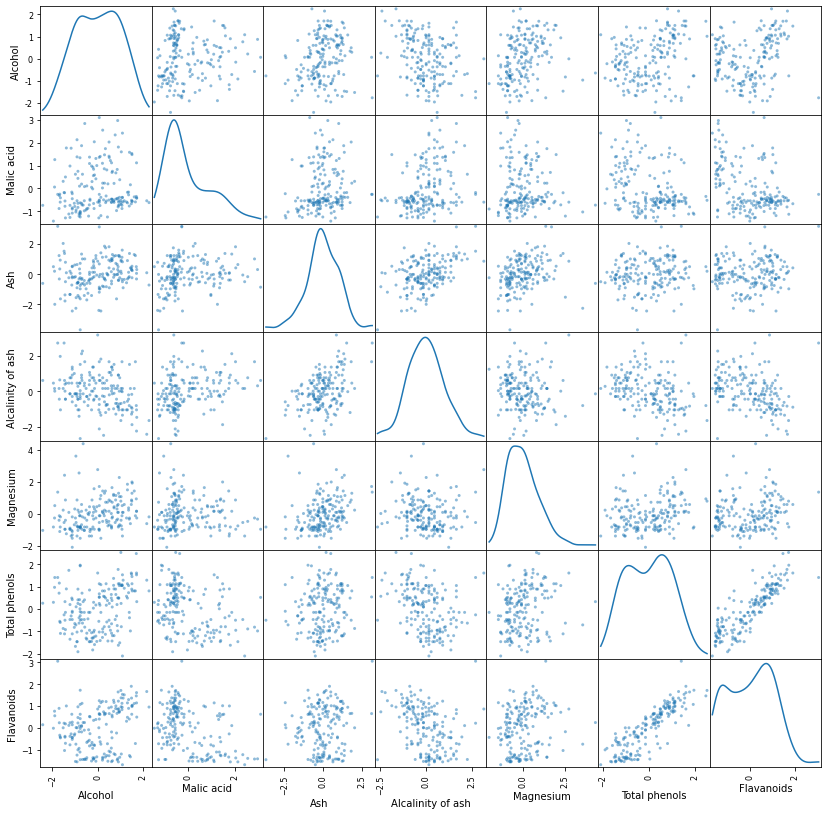

In [39]:
_ = pd.plotting.scatter_matrix(wine.loc[:, 'Alcohol':'Flavanoids'], figsize=(14,14), diagonal='kde')

# Seaborn

Seaborn — это современный инструмент визуализации данных для Python, созданный Майклом Васком. Высокоуровневый интерфейс Seaborn упрощает визуальное изучение ваших данных, позволяя легко перебирать различные типы графиков и макетов с минимальным ручным кодированием. Таким образом, Seaborn дополняет matplotlib (о котором мы узнаем позже) в наборе инструментов для обработки данных.

Простой способ увидеть, как Seaborn может немедленно улучшить визуализацию ваших данных, — установить стиль графика, используя один из нескольких встроенных стилей.

Вот простой сюжет панд до Seaborn:

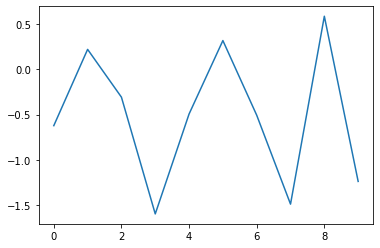

In [40]:
normals.plot();

Seaborn обычно импортируется с использованием псевдонима sns. Простой импорт Seaborn вызывает настройки Seaborn по умолчанию. Как правило, это более приглушенные цвета со светло-серым фоном и тонкими белыми линиями сетки.

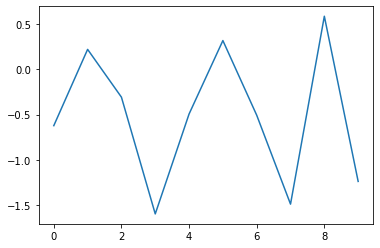

In [41]:
import seaborn as sns

normals.plot();

## Customizing Seaborn Figure Aesthetics

Seaborn управляет параметрами построения в двух основных группах:

установка компонентов эстетического стиля сюжета
масштабирование элементов фигуры

This default theme is called `darkgrid`; there are a handful of preset themes:

- `darkgrid`
- `whitegrid` 
- `dark` 
- `white` 
- `ticks`

Each are suited to partiular applications. For example, in more "data-heavy" situations, one might want a lighter background.

We can apply an alternate theme using `set_style`:

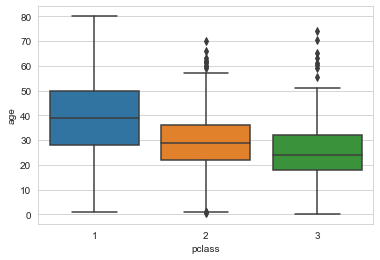

In [42]:
sns.set_style('whitegrid')
sns.boxplot(x='pclass', y='age', data=titanic);

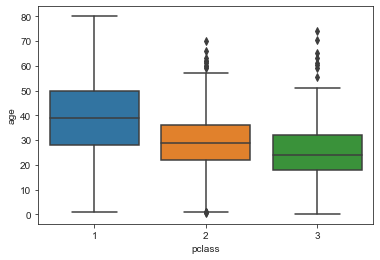

In [43]:
sns.set_style('ticks')
sns.boxplot(x='pclass', y='age', data=titanic);

Фигура по-прежнему выглядит тяжелой, а оси отвлекают внимание от линий на блочной диаграмме. Мы можем удалить их с помощью despine:

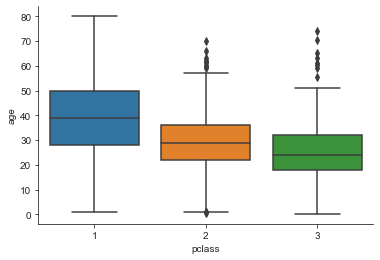

In [44]:
sns.boxplot(x='pclass', y='age', data=titanic)
sns.despine()

Наконец, мы можем дать сюжету еще больше места, указав аргументы для отказа; в частности, мы можем отодвинуть оси от элементов фигуры (через смещение) и минимизировать длину осей до наименьшего и самого высокого значения основного деления (через обрезку):

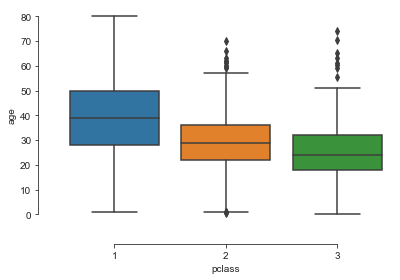

In [45]:
sns.boxplot(x='pclass', y='age', data=titanic)
sns.despine(offset=20, trim=True)

Второй набор эстетических параметров фигуры управляет масштабом элементов графика.

Существует четыре шкалы по умолчанию, которые соответствуют разным контекстам, в которых график может быть предназначен для использования.

- `paper`
- `notebook`
- `talk`
- `poster`

По умолчанию используется блокнот, оптимизированный для использования в блокнотах Jupyter. Мы можем изменить масштаб с помощью `set_context`:

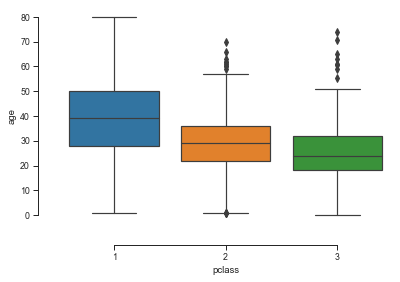

In [46]:
sns.set_context('paper')

sns.boxplot(x='pclass', y='age', data=titanic)
sns.despine(offset=20, trim=True)

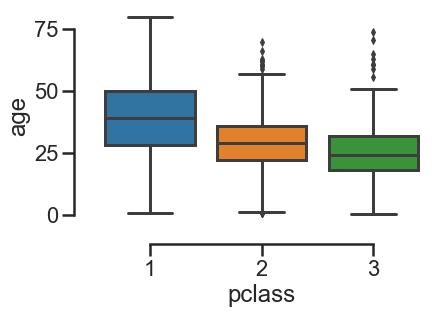

In [47]:
sns.set_context('poster')

sns.boxplot(x='pclass', y='age', data=titanic)
sns.despine(offset=20, trim=True)

Каждый из контекстов можно настроить для более конкретных приложений:

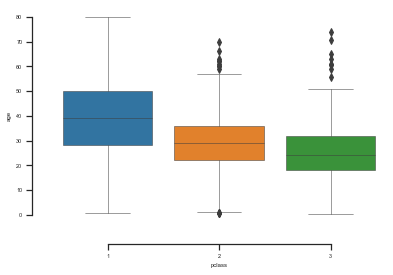

In [48]:
sns.set_context('notebook', font_scale=0.5, rc={'lines.linewidth': 0.5})

sns.boxplot(x='pclass', y='age', data=titanic)
sns.despine(offset=20, trim=True)

The detailed settings are available in the `plotting.context`:

In [49]:
sns.plotting_context()

{'font.size': 6.0,
 'axes.labelsize': 6.0,
 'axes.titlesize': 6.0,
 'xtick.labelsize': 5.5,
 'ytick.labelsize': 5.5,
 'legend.fontsize': 5.5,
 'axes.linewidth': 1.25,
 'grid.linewidth': 1.0,
 'lines.linewidth': 0.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 1.25,
 'ytick.major.width': 1.25,
 'xtick.minor.width': 1.0,
 'ytick.minor.width': 1.0,
 'xtick.major.size': 6.0,
 'ytick.major.size': 6.0,
 'xtick.minor.size': 4.0,
 'ytick.minor.size': 4.0,
 'legend.title_fontsize': 6.0}

Seaborn works hand-in-hand with pandas to create publication-quality visualizations quickly and easily from `DataFrame` and `Series` data.

For example, we can generate kernel density estimates of two sets of simulated data, via the `kdeplot` function.

In [50]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])
data.head()

,x,y
0,1.693703,-1.328568
1,1.200871,-0.291995
2,-3.989365,-0.038042
3,-0.921532,-0.828203
4,-0.013675,0.683711


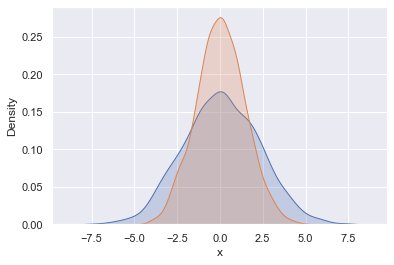

In [51]:
sns.set()

for col in 'xy':
    sns.kdeplot(x=data[col], shade=True)

histplot позволяет вам построить KDE вместе с лежащей в его основе гистограммой.

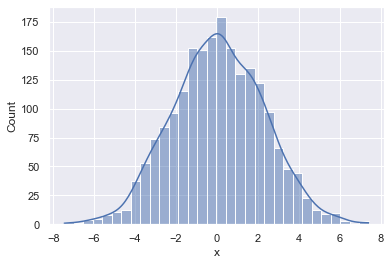

In [53]:
sns.histplot(x='x', data=data, kde=True);

Оценки плотности ядра также могут быть двумерными при передаче аргумента y, а также аргумента x.

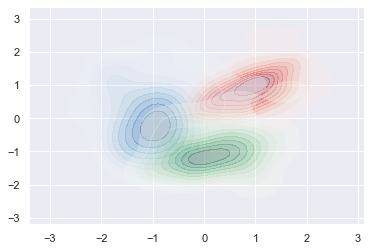

In [55]:
cmap = {1:'Reds', 2:'Blues', 3:'Greens'}

for grape in cmap:
    alcohol, phenols = wine.loc[wine.Grape==grape, ['Alcohol', 'Total phenols']].T.values
    
    sns.kdeplot(x=alcohol, y=phenols,
        cmap=cmap[grape], shade=True, thresh=0.05, alpha=0.3)

 `jointplot`Точно так же совместный график будет генерировать заштрихованную совместную KDE вместе с маргинальными KDE двух переменных

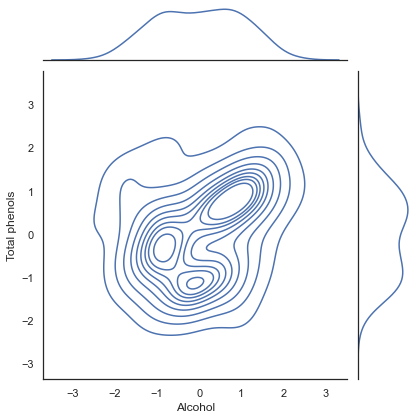

In [56]:
with sns.axes_style('white'):
    sns.jointplot(x="Alcohol", y="Total phenols", data=wine, kind='kde');

Обратите внимание, что в приведенном выше примере мы использовали менеджер контекста, чтобы временно назначить графику тип белой оси. Это отличный способ изменить значения по умолчанию только для одной фигуры без необходимости устанавливать, а затем сбрасывать настройки.

Вы можете сделать это с рядом настроек по умолчанию Seaborn. Вот словарь настроек стиля:

In [57]:
sns.axes_style()

{'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': 'white',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

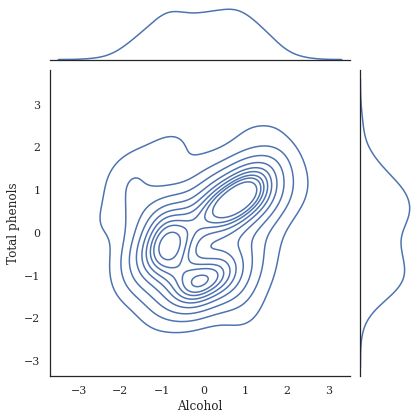

In [58]:
with sns.axes_style('white', {'font.family': ['serif']}):
    sns.jointplot(x="Alcohol", y="Total phenols", data=wine, kind='kde');

Чтобы исследовать корреляции между несколькими переменными, функция pairplot создает попарные графики вместе с гистограммами по диагонали и изрядно настраивает.

In [59]:
titanic = titanic[titanic.age.notnull() & titanic.fare.notnull()]

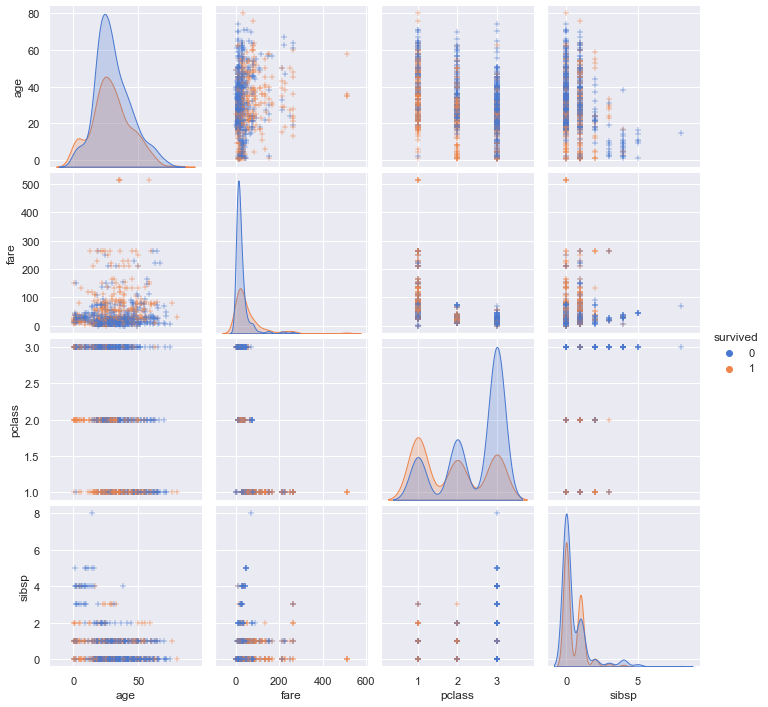

In [60]:
sns.pairplot(titanic, vars=['age', 'fare', 'pclass', 'sibsp'], hue='survived', palette="muted", markers='+');

## Plotting Small Multiples on Data-aware Grids

Приведенный выше парный график является примером воспроизведения одной и той же визуализации в разных подмножествах определенного набора данных. Это облегчает визуальное сравнение между группами, делая более очевидными закономерности в сложных данных.

Seaborn предоставляет гибкие средства для создания графиков в «сетках с поддержкой данных» при условии, что ваш DataFrame pandas структурирован соответствующим образом. В частности, вам нужно организовать ваши переменные в столбцы, а ваши наблюдения (реплицировать) в строки. Используя этот базовый шаблон организации, вы можете воспользоваться преимуществами функций Seaborn для простого создания решетчатых графиков из вашего набора данных.

FacetGrid — это объект Seaborn для одновременного построения нескольких переменных в виде решетчатых графиков. Переменные могут быть назначены одному из трех измерений FacetGrid:

ряды
столбцы
цвета (оттенок)
Давайте используем титанический набор данных для создания решетчатого графика, который представляет 3 переменные одновременно. Он состоит из 2 шагов:

Создайте объект FacetGrid, который связывает две переменные в наборе данных в сетке попарных сравнений.
Добавьте фактический график (расстояние), который будет использоваться для визуализации каждого сравнения.
Первый шаг создает набор осей в соответствии с размерами, переданными как строка и столбец. Однако эти оси пусты:

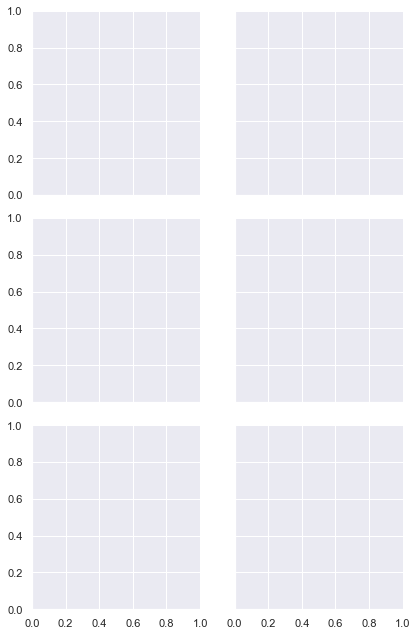

In [61]:
sns.FacetGrid(titanic, col="sex", row="pclass");

The `FacetGrid`'s `map` method then allows a third variable to be plotted in each grid cell, according to the plot type passed. For example, a `distplot` will generate both a **histogram** and **kernel density estimate** for `age`, according each combination of sex and passenger class as follows:

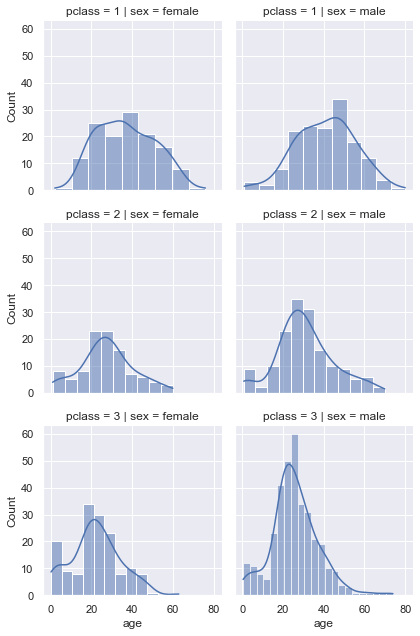

In [62]:
g = sns.FacetGrid(titanic, col="sex", row="pclass")
g.map(sns.histplot, 'age', kde=True);

Чтобы более полно изучить решетчатые участки в Seaborn, мы будем использовать набор биомедицинских данных. Эти данные взяты из многоцентрового рандомизированного контролируемого исследования ботулинического токсина типа B (BotB) у пациентов с цервикальной дистонией в девяти центрах США.

Рандомизировано для плацебо (N = 36), 5000 единиц BotB (N = 36), 10 000 единиц BotB (N = 37)
Переменная ответа: общий балл по западной рейтинговой шкале спазматической кривошеи Торонто (TWSTRS), измеряющей тяжесть, боль и инвалидность цервикальной дистонии (высокие баллы означают большее ухудшение)
TWSTRS измеряли на исходном уровне (неделя 0) и через 2, 4, 8, 12, 16 недель после начала лечения.

In [63]:
cdystonia = pd.read_csv('../data/cdystonia.csv')
cdystonia.head()

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39


Обратите внимание, что эти данные представляют собой временные ряды отдельных пациентов, состоящие из контрольных измерений с интервалом в 2–4 недели после лечения.

В качестве первого прохода мы можем захотеть увидеть, как траектории результатов варьируются от пациента к пациенту. Используя точечный график, мы можем создать сетку графиков для представления временных рядов для каждого пациента. Давайте просто посмотрим на первых 12 пациентов:

C:\Users\Margarita\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


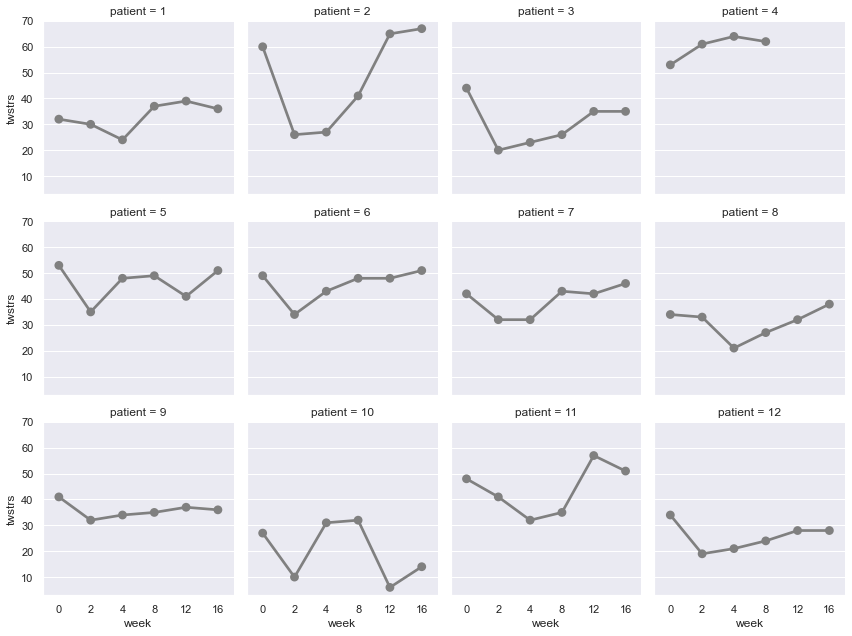

In [64]:
g = sns.FacetGrid(cdystonia[cdystonia.patient<=12], col='patient', col_wrap=4)
g.map(sns.pointplot, 'week', 'twstrs', color='0.5');

Точечный график особенно полезен для представления центральной тенденции и дисперсии нескольких повторных измерений. Изучив индивидуальные ответы на лечение, мы можем теперь захотеть посмотреть на средний ответ среди групп лечения. Там, где есть несколько результатов (переменная y) для каждого предиктора (переменная x), точечный график будет отображать среднее значение и вычислять 95% доверительный интервал для среднего значения с использованием начальной загрузки:

C:\Users\Margarita\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


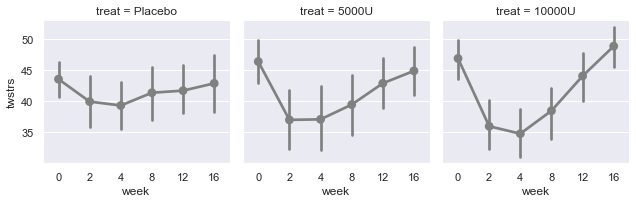

In [65]:
ordered_treat = ['Placebo', '5000U', '10000U']
g = sns.FacetGrid(cdystonia, col='treat', col_order=ordered_treat)
g.map(sns.pointplot, 'week', 'twstrs', color='0.5');

Обратите внимание, что для обеспечения желаемого порядка фасетов (от самого низкого до самого высокого уровня обработки) метки были переданы в качестве аргумента col_order в FacetGrid.

Давайте вернемся к функции kdeplot, чтобы посмотреть, как распределение переменных результата зависит от времени и лечения. Однако вместо гистограммы мы включим здесь «коврик», который представляет собой просто расположение отдельных точек данных, которые использовались для подгонки оценки плотности ядра с использованием функции rugplot.

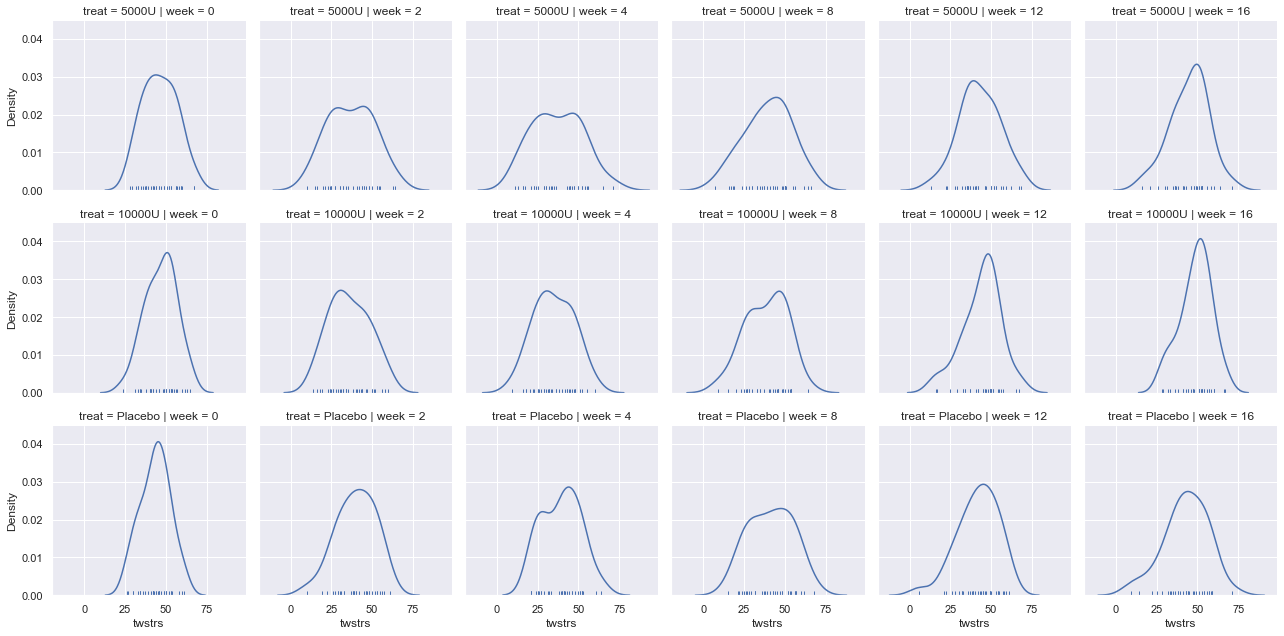

In [66]:
g = sns.FacetGrid(cdystonia, row='treat', col='week')
g.map(sns.kdeplot, 'twstrs')
g.map(sns.rugplot, 'twstrs');

Мы можем пойти дальше в статистическом анализе, используя regplot для проведения регрессионного анализа.

Например, мы можем одновременно исследовать взаимосвязь между возрастом и первичной переменной исхода как функцию как полученного лечения, так и недели лечения, создав диаграмму рассеяния данных и установив линейную зависимость между возрастом и twstrs:

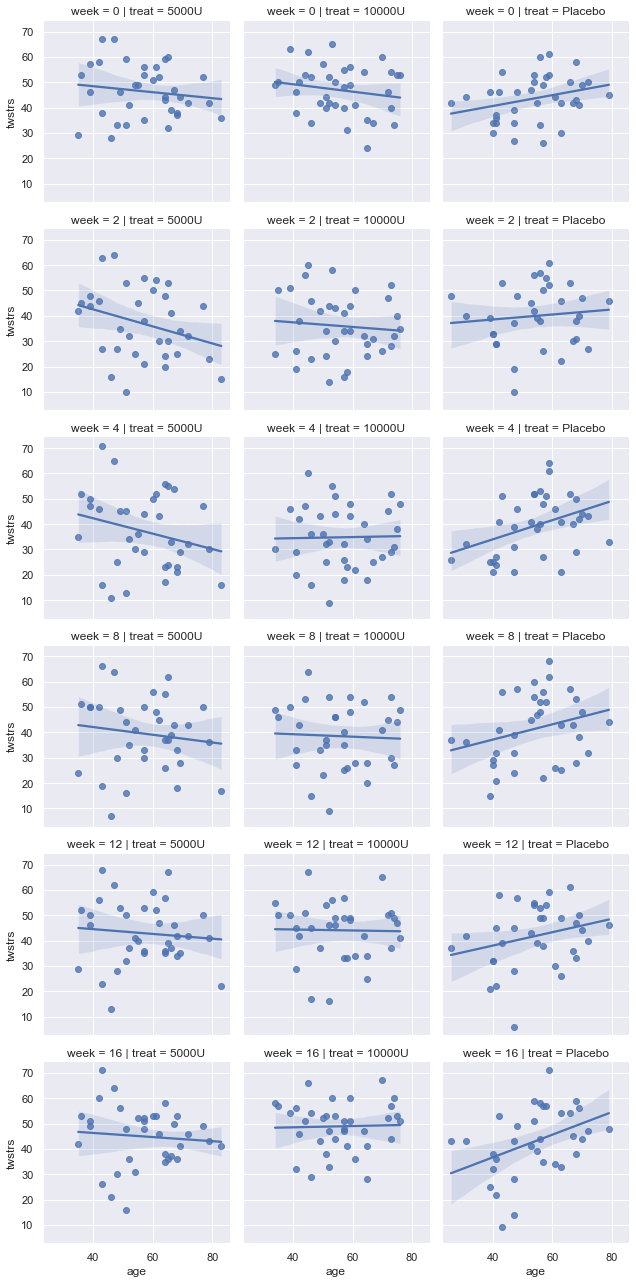

In [67]:
g = sns.FacetGrid(cdystonia, col='treat', row='week')
g.map(sns.regplot, 'age', 'twstrs');

## Exercise

From the `AIS` subdirectory of the data directory, import both the `vessel_information` table and `transit_segments` table and join them. Use the resulting table to create a faceted scatterplot of segment length (`seg_length`) and average speed (`avg_sog`) as a trellis plot by flag and vessel type.

To simplify the plot, first generate a subset of the data that includes only cargo, tanker and passenger ship types for the 5 most common countries.

In [68]:
segments = pd.read_csv('../data/AIS/transit_segments.csv')
segments.head()

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27
1,1,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,4/6/09 14:31,4/6/09 15:20
2,1,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,4/6/09 14:36,4/6/09 14:55
3,1,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,4/10/09 17:58,4/10/09 18:34
4,1,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,4/10/09 17:59,4/10/09 18:35


In [ ]:
# Write your answer here

## References

* Rougier NP, Droettboom M, Bourne PE. Ten Simple Rules for Better Figures. PLoS Comput Biol. 2014;10(9):e1003833. [doi:10.1371/journal.pcbi.1003833](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833).
* Waskom, M. [Seaborn Tutorial](https://stanford.edu/~mwaskom/software/seaborn/tutorial.html)
* VanderPlas, J. [Data visualization with Seaborn](https://www.oreilly.com/learning/data-visualization-with-seaborn), O'Reilly.